### IMPORTING PACKAGES

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GuilhermeFranco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GuilhermeFranco\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GuilhermeFranco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

c:\Universidade\Mestrado\2º ano\MEIA-8-T3\.venv\lib\site-packages\datasets\load.py:1461: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


## Loading Data

In [29]:
# Convert the dataset to a Pandas DataFrame
df_train = pd.DataFrame(dataset['train'])

# Print the shape and head of the DataFrame
print(df_train.shape)
print(df_train.head())


(16000, 2)
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


## EDA

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

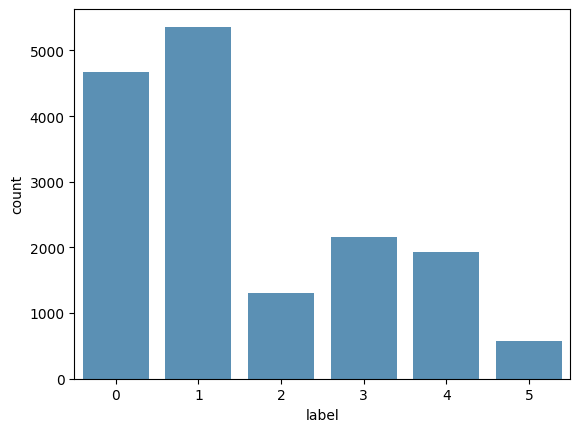

In [30]:
# CLASS DISTRIBUTION 
# 0 sadness
# 1 joy
# 2 love
# 3 anger
# 4 fear
# 5 surprise
# if dataset is balanced or not
# Change these emotions. 
# Final emotions to use: Happiness, Surprise, Anger, Sadness, Fear, Disgust and Neutral
x=df_train['label'].value_counts()
print(x)
sns.barplot(x=x.index, y=x, alpha=0.8)

In [31]:
#Missing values
df_train.isna().sum()

text     0
label    0
dtype: int64

In [32]:
# sadness, joy, love, anger, fear, and surprise

#1. WORD-COUNT
print("WORD-COUNT")
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
print(df_train[df_train['label']==0]['word_count'].mean()) #sadness
print(df_train[df_train['label']==1]['word_count'].mean()) #joy
print(df_train[df_train['label']==2]['word_count'].mean()) #love
print(df_train[df_train['label']==3]['word_count'].mean()) #anger
print(df_train[df_train['label']==4]['word_count'].mean()) #fear
print(df_train[df_train['label']==5]['word_count'].mean()) #surprise

print("\nCHARACTER-COUNT")
#2. CHARACTER-COUNT
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
print(df_train[df_train['label']==0]['char_count'].mean())
print(df_train[df_train['label']==1]['char_count'].mean())
print(df_train[df_train['label']==2]['char_count'].mean())
print(df_train[df_train['label']==3]['char_count'].mean())
print(df_train[df_train['label']==4]['char_count'].mean())
print(df_train[df_train['label']==5]['char_count'].mean())

print("\nUNIQUE WORD-COUNTT")
#3. UNIQUE WORD-COUNT
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
print(df_train[df_train['label']==0]['unique_word_count'].mean())
print(df_train[df_train['label']==1]['unique_word_count'].mean())
print(df_train[df_train['label']==2]['unique_word_count'].mean())
print(df_train[df_train['label']==3]['unique_word_count'].mean())
print(df_train[df_train['label']==4]['unique_word_count'].mean())
print(df_train[df_train['label']==5]['unique_word_count'].mean())

WORD-COUNT
18.361980282897555
19.498135024244686
20.70015337423313
19.229735988883743
18.84460505937016
19.97027972027972

CHARACTER-COUNT
92.55057865409344


98.5544572920552
104.03374233128834
96.91153311718388
96.12390294269488
101.67657342657343

UNIQUE WORD-COUNTT
16.24903557651093
17.290936217829167
18.197852760736197
16.930523390458546
16.735673722250905
17.692307692307693


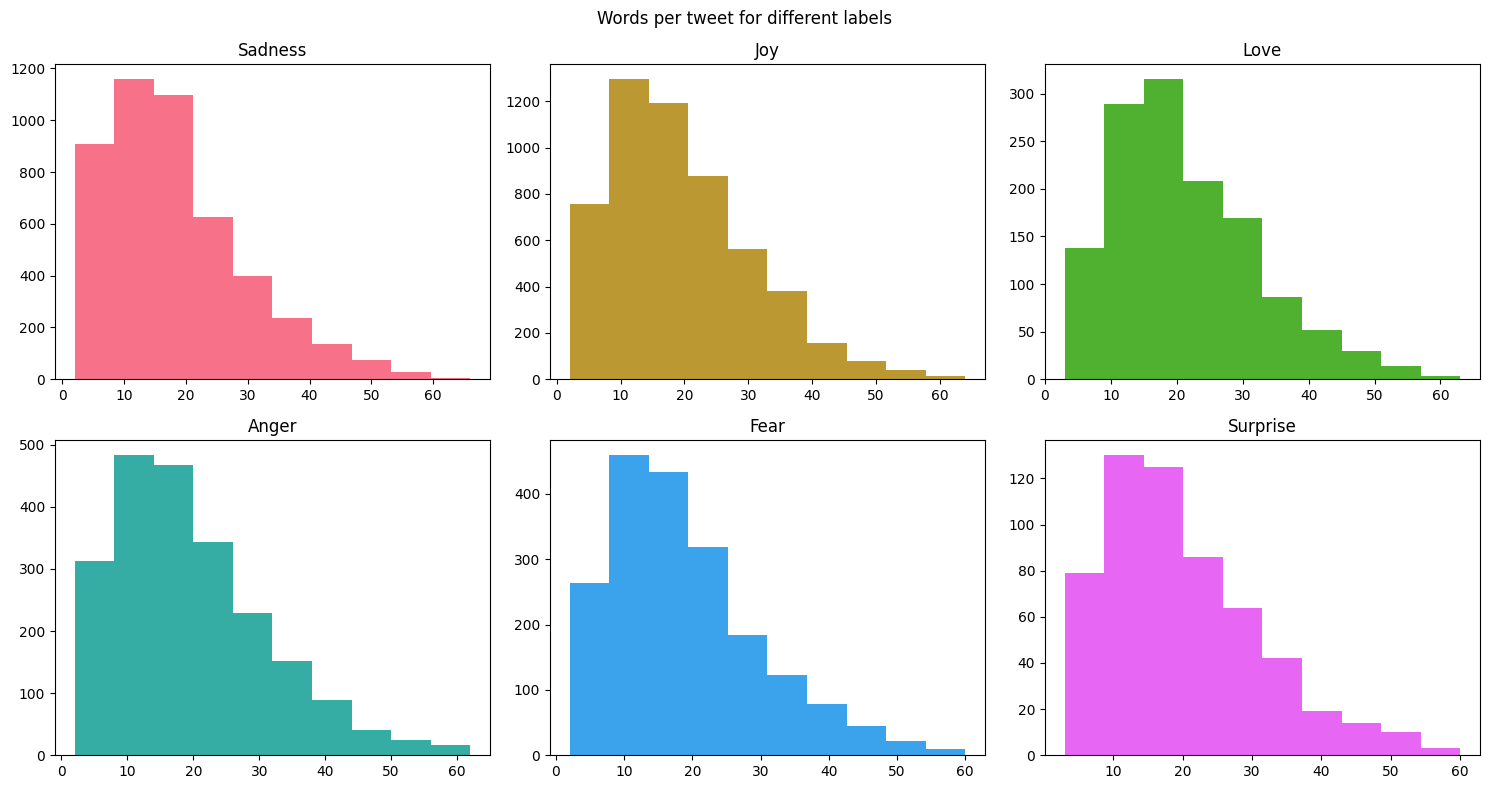

In [33]:

# Define a mapping from numeric labels to emotion names
label_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Define a color palette for the emotions
colors = sns.color_palette("husl", len(label_mapping))

# Plotting word-count per tweet for each label
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for idx, (label_num, label_name) in enumerate(label_mapping.items()):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    train_words = df_train[df_train['label'] == label_num]['word_count']
    ax.hist(train_words, color=colors[label_num])
    ax.set_title(label_name.capitalize())

fig.suptitle('Words per tweet for different labels')
plt.tight_layout()
plt.show()

## PRE-PROCESSING

In [34]:
#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Sample text
text = "This is a sample text. It includes stopwords, plurals, and different verb forms like running, ran, and runs."

# 1. STOPWORD REMOVAL
def stopword(string):
    return ' '.join([i for i in string.split() if i.lower() not in stopwords.words('english')])

# 2. STEMMING
snow = SnowballStemmer('english')
def stemming(string):
    return " ".join([snow.stem(i) for i in word_tokenize(string)])

# 3. LEMMATIZATION
wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    return " ".join([wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)])

# Labels (tags)
labels = ['sadness','joy','love','anger','fear','surprise']

# Iterate over each label and apply text processing techniques
for label in labels:
    print("Processing text for label:", label)
    text_processed = text.lower()  # Convert text to lowercase
    text_processed = stopword(text_processed)
    text_processed = stemming(text_processed)
    text_processed = lemmatizer(text_processed)
    print("Processed text for", label, ":", text_processed)
    print()


Processing text for label: sadness
Processed text for sadness : sampl text . includ stopword , plural , differ verb form like run , ran , run .

Processing text for label: joy
Processed text for joy : sampl text . includ stopword , plural , differ verb form like run , ran , run .

Processing text for label: love
Processed text for love : sampl text . includ stopword , plural , differ verb form like run , ran , run .

Processing text for label: anger
Processed text for anger : sampl text . includ stopword , plural , differ verb form like run , ran , run .

Processing text for label: fear
Processed text for fear : sampl text . includ stopword , plural , differ verb form like run , ran , run .

Processing text for label: surprise
Processed text for surprise : sampl text . includ stopword , plural , differ verb form like run , ran , run .



In [36]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df_train['clean_text'] = df_train['text'].apply(lambda x: finalpreprocess(x))
df_train=df_train.drop(columns=['word_count','char_count','unique_word_count'])
df_train.head()

,text,label,clean_text
0,i didnt feel humiliated,0,didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damn hopeful around someon...
2,im grabbing a minute to post i feel greedy wrong,3,im grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feel nostalgic fireplace know still property
4,i am feeling grouchy,3,feel grouchy


### Word2Vec model

In [37]:
# Create Word2Vec model
# Here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
# Length of words_f is the number of documents/sentences in your dataset
df_train['clean_text_tok'] = [nltk.word_tokenize(i) for i in df_train['clean_text']]  # Convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_train['clean_text_tok'], min_count=1)  # Min_count=1 means word should be present at least across all documents,
# If min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))  # Combination of word and its vector

# For converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # If a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

### TRAIN TEST SPLITTING OF LABELLED DATASET

In [38]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_train["clean_text"],
                                                  df_train["label"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

### Building AI models (Text-classification)

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2, alpha=1e-4,
                               solver='adam', verbose=10, random_state=42,
                               learning_rate_init=0.001)

# Fit the MLP classifier on TF-IDF vectors
mlp_classifier.fit(X_train_vectors_tfidf, y_train)

# Predict y value for validation dataset
y_predict = mlp_classifier.predict(X_val_vectors_tfidf)
y_prob = mlp_classifier.predict_proba(X_val_vectors_tfidf)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_val, y_predict)
print('Accuracy:', accuracy)

# Compute precision
precision = precision_score(y_val, y_predict, average='weighted')
print('Precision:', precision)

# Compute recall
recall = recall_score(y_val, y_predict, average='weighted')
print('Recall:', recall)

# Compute F1-score
f1 = f1_score(y_val, y_predict, average='weighted')
print('F1-score:', f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_predict)
print('Confusion Matrix:\n', conf_matrix)


Iteration 1, loss = 1.63347060
Iteration 2, loss = 1.25076597
Accuracy: 0.668125
Precision: 0.7640501180550092
Recall: 0.668125
F1-score: 0.6044007804319251
Confusion Matrix:
 [[ 821   84    0    1    0    0]
 [  41 1022    0    0    0    0]
 [  47  233   11    2    0    0]
 [ 108  155    0  168    3    0]
 [ 114  153    0    7  115    0]
 [  41   66    0    1    6    1]]


c:\Universidade\Mestrado\2º ano\MEIA-8-T3\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
# Load the new dataset for testing
df_test = pd.DataFrame(dataset['test'])
df_test

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


### TESTING THE MODEL ON UNLABELLED DATASET

In [41]:
# Load the new dataset for testing
df_test = pd.DataFrame(dataset['test'])

# Preprocess the text in the test dataset
df_test['clean_text'] = df_test['text'].apply(finalpreprocess)

# Convert the preprocessed text to TF-IDF vectors
X_test_vectors_tfidf = tfidf_vectorizer.transform(df_test['clean_text'])

# Predict the labels for the test dataset using the trained MLP classifier
y_predict_test = mlp_classifier.predict(X_test_vectors_tfidf)

# Print the predictions
print("Predictions for test dataset:")
print(y_predict_test)

# Optionally, you can compute and print other evaluation metrics for the test dataset
# For example, if you have ground truth labels for the test dataset (df_test['ground_truth_labels']),
# you can compute accuracy, precision, recall, F1-score, and confusion matrix
# using the same metrics as shown in the previous code snippet.

# Save the predictions to a CSV file
df_test['id'] = df_test.index  # Assuming the index serves as the ID
df_test[['id', 'label']].to_csv('submission.csv', index=False)

Predictions for test dataset:
[0 0 0 ... 1 1 0]


In [42]:
# Define a mapping from numeric labels to emotions
emotion_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

In [43]:
# Preprocess the single input
input_test = "I am feeling so angry"
input_test = finalpreprocess(input_test)  # preprocess the data

# Convert the preprocessed input to a vector using TF-IDF vectorizer
X_vector = tfidf_vectorizer.transform([input_test])  # converting input_test to vector

# Use the trained model to predict on the input vector
y_predict = mlp_classifier.predict(X_vector)  # use the trained MLP classifier on X_vector
y_prob = mlp_classifier.predict_proba(X_vector)[:, 1]

# Map numeric labels to emotions
predicted_emotion = emotion_mapping[y_predict[0]]

# Print the predicted emotion and its probability
print("Predicted Emotion:", predicted_emotion)
print("Probability of Being Positive:", y_prob[0])


Predicted Emotion: anger
Probability of Being Positive: 0.12919493051249584


In [44]:
# Preprocess the single input
input_test = "I am feeling so sad"
input_test = finalpreprocess(input_test)  # preprocess the data

# Convert the preprocessed input to a vector using TF-IDF vectorizer
X_vector = tfidf_vectorizer.transform([input_test])  # converting input_test to vector

# Use the trained model to predict on the input vector
y_predict = mlp_classifier.predict(X_vector)  # use the trained MLP classifier on X_vector
y_prob = mlp_classifier.predict_proba(X_vector)[:, 1]

# Map numeric labels to emotions
predicted_emotion = emotion_mapping[y_predict[0]]

# Print the predicted emotion and its probability
print("Predicted Emotion:", predicted_emotion)
print("Probability of Being Positive:", y_prob[0])


Predicted Emotion: sadness
Probability of Being Positive: 0.14695395428658126
